In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# 시스템에 따라 폰트 설정 (Windows와 macOS/리눅스에 따라 다르게 처리)
if platform.system() == 'Windows':
    # Windows 사용 시 나눔고딕 폰트를 설정
    font_path = r'C:\Users\rapa\AppData\Local\Microsoft\Windows\Fonts\D2Coding-Ver1.3-20171129.ttf'
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

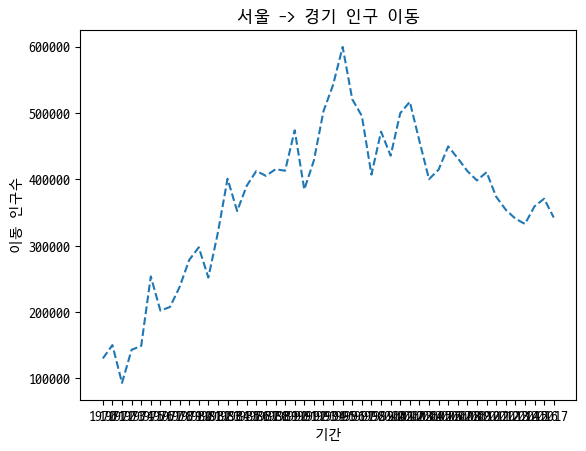

In [10]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, linestyle="--")

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력